# QRT ENS Data Challenge 2023 - Context

Contexte

Une multitude de facteurs influencent le prix de l'electricité au quotidien. Des variations locales du climat pourront à la fois affecter la production et la demande électrique par exemple. Des phénomènes à plus long terme, comme le réchauffement climatique, auront également un impact évident. Des évènements géopolitiques, comme la guerre en Ukraine, peuvent en parallèle faire bouger le prix des matières premières qui sont clefs dans la production d'électricité, sachant que chaque pays s'appuie sur un mix énergétique qui lui est propre (nucléaire, solaire, hydrolique, gaz, charbon, etc). De plus chaque pays peut importer/exporter de l'électricité avec ses voisins au travers de marchés dynamiques, comme en Europe. Ces différents élements rendent assez complexe la modélisation du prix de l'électricité par pays.

But

L'objectif est de modéliser le prix l'électricité à partir de données météorologiques, énergétiques (matières premières) et commerciales pour deux pays européens - la France et l'Allemagne. On soulignera que c'est ici un problème d'explication des prix par d'autres variables concomitantes et non pas un problème de prédiction.

Plus précisément le but est de construire un modèle qui, à partir de ces variables explicatives, renvoie une bonne estimation de la variation journalière du prix de contrats à terme (dits futures) sur l'électricité, en France ou en Allemagne. Ces contrats permettent d'acheter (ou de vendre) une quantité donnée d'électricité à un prix fixé par le contrat et qui sera livrée à une date future spécifiée (maturité du contrat). Les futures sont donc des instruments financiers qui donnent une estimation de la valeur de l'électricité au moment de la maturité du contrat à partir des conditions actuelles du marché - ici, on se restreint à des futures à courte maturité (24h). Soulignons que l'échange de futures sur l'electricité est un marché dynamique en Europe.

Concernant les variables explicatives, les participants auront accès pour chaque pays à des mesures journalières de données météorologiques (température, quantité de pluie et force du vent), de production énergétique (variations des prix de différentes matières premières / énergies) et d'utilisation de l'électricité (consommation, échanges entre ces deux pays, import-export avec le reste de l'Europe).

La fonction de score (métrique) utilisée est la corrélation de Spearman entre la réponse du participant et les variations réelles du prix des futures contenues dans le jeu de données de test.

N'hésitez pas à consulter notre forum dédié et notre page LinkedIn pour plus d'information sur le challenge et sur QRT.

Description des données

Trois jeux de données sont fournis au format csv : les données d'entrainement en entrée X_train et en sortie Y_train, et les données test en entrée X_test.

NB : Les données d'entrée X_train et X_test représentent les même variables explicatives mais sur deux périodes de temps différentes.

La colonne ID de X_train et Y_train est identique, et de même pour les données test. Les données d'entrainement fournissent 1494 lignes, et les données de test en contiennent 654.

Les données d'entrée possèdent 35 colonnes :

ID : Identifiant d'indexe unique, associé à un jour (DAY_ID) et un pays (COUNTRY),
DAY_ID : Identifiant du jour - les dates ont été annonymisées en préservant la structure des données,
COUNTRY : Identifiant du pays - DE = Allemagne, FR = France,

et composées ensuite de variations journalières du prix de matières premières,

GAS_RET : Gaz en Europe,
COAL_RET : Charbon en Europe,
CARBON_RET : Futures sur les emissions carbone,

de mesures météorologiques (journalières, dans le pays x),

x_TEMP : Temperature,
x_RAIN : Pluie,
x_WIND : Vent,

de mesures de productions d'energie (journalière, dans le pays x),

x_GAS : Gaz naturel,
x_COAL : Charbon,
x_HYDRO : Hydrolique,
x_NUCLEAR : Nucléaire,
x_SOLAR : Photovoltaïque,
x_WINDPOW : Eolienne,
x_LIGNITE : Lignite,

et de mesures d'utilisation électrique (journalières, dans le pays x),

x_CONSUMPTON : Electricité totale consommée,
x_RESIDUAL_LOAD : Electricité consommée après utilisation des énergies renouvelables,
x_NET_IMPORT: Electricité importée depuis l'Europe,
x_NET_EXPORT: Electricité exportée vers l'Europe,
DE_FR_EXCHANGE: Electricité échangée entre Allemagne et France,
FR_DE_EXCHANGE: Electricité échangée entre France et Allemagne.

Les données en sortie se composent de deux colonnes :

ID : Identifiant unique - le même que celui des données d'entrée,
TARGET : Variation journalière du prix de futures d'électricité (maturité 24h).

Les solutions envoyées par les participants devront être structurées comme les données en sortie, à savoir un fichier au format csv avec deux colonnes ID and TARGET, avec comme valeurs ID les valeurs correspondantes à la colonne ID de X_test. Un exemple de fichier contenant une solution aléatoire est fourni - Cf. aussi le notebook fourni en materiel supplémentaire.

Description du benchmark

Le benchmark pour ce challenge consiste en une simple régression linéaire, après un léger nettoyage des données : les valeurs manquantes (NaN) ont été remplacées par des zéros et la colonne COUNTRY a été supprimée - en d'autres termes, nous avons utilisé un modèle identique pour la France et l'Allemagne.

Le score public obtenu pour ce benchmark est de 15.86%. Un notebook contenant la génération du benchmark et quelques discussions est disponible en "supplementary files" que vous trouverez sur cette page (colonne de droite).

## Libraries

In [10]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



## Loading data

- `X_train` and `X_test` both have $35$ columns that represent the same explanatory variables but over different time periods. 

- `X_train` and `Y_train` share the same column `ID` - each row corresponds to a unique ID associated wwith a day and a country. 

- The target of this challenge `TARGET` in `Y_train` corresponds to the price change for daily futures contracts of 24H electricity baseload. 

- **You will notice some columns have missing values**.


In [11]:
# After downloading the X_train/X_test/Y_train .csv files in your working directory:

X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')
X_test = pd.read_csv('X_test.csv')

In [12]:
X_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


In [13]:
Y_train.head()

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733


General Analysis

Missing values in training data:
DE_NET_EXPORT     124
DE_NET_IMPORT     124
DE_RAIN            94
FR_TEMP            94
DE_TEMP            94
FR_WIND            94
DE_WIND            94
FR_RAIN            94
FR_NET_IMPORT      70
FR_NET_EXPORT      70
DE_FR_EXCHANGE     25
FR_DE_EXCHANGE     25
dtype: int64

Missing values in test data:
DE_NET_EXPORT     47
DE_NET_IMPORT     47
DE_RAIN           40
FR_TEMP           40
DE_TEMP           40
FR_WIND           40
DE_WIND           40
FR_RAIN           40
FR_NET_IMPORT     24
FR_NET_EXPORT     24
DE_FR_EXCHANGE     9
FR_DE_EXCHANGE     9
dtype: int64


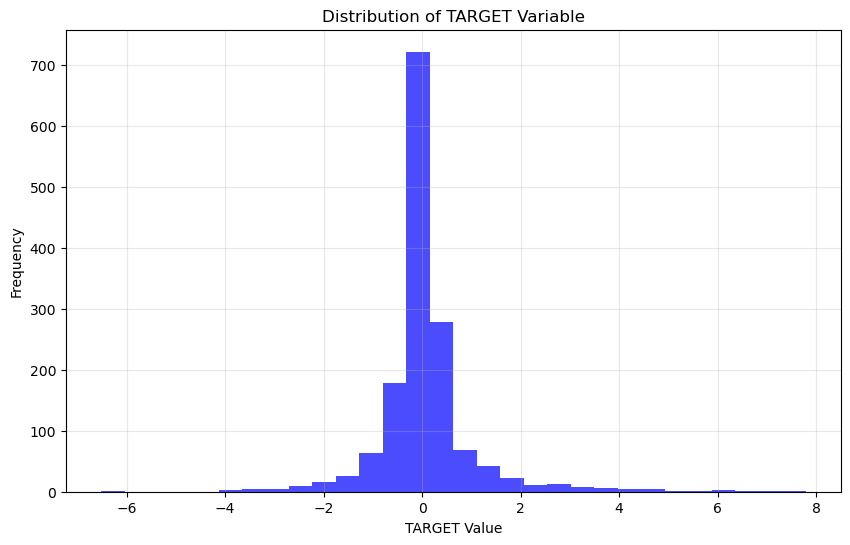

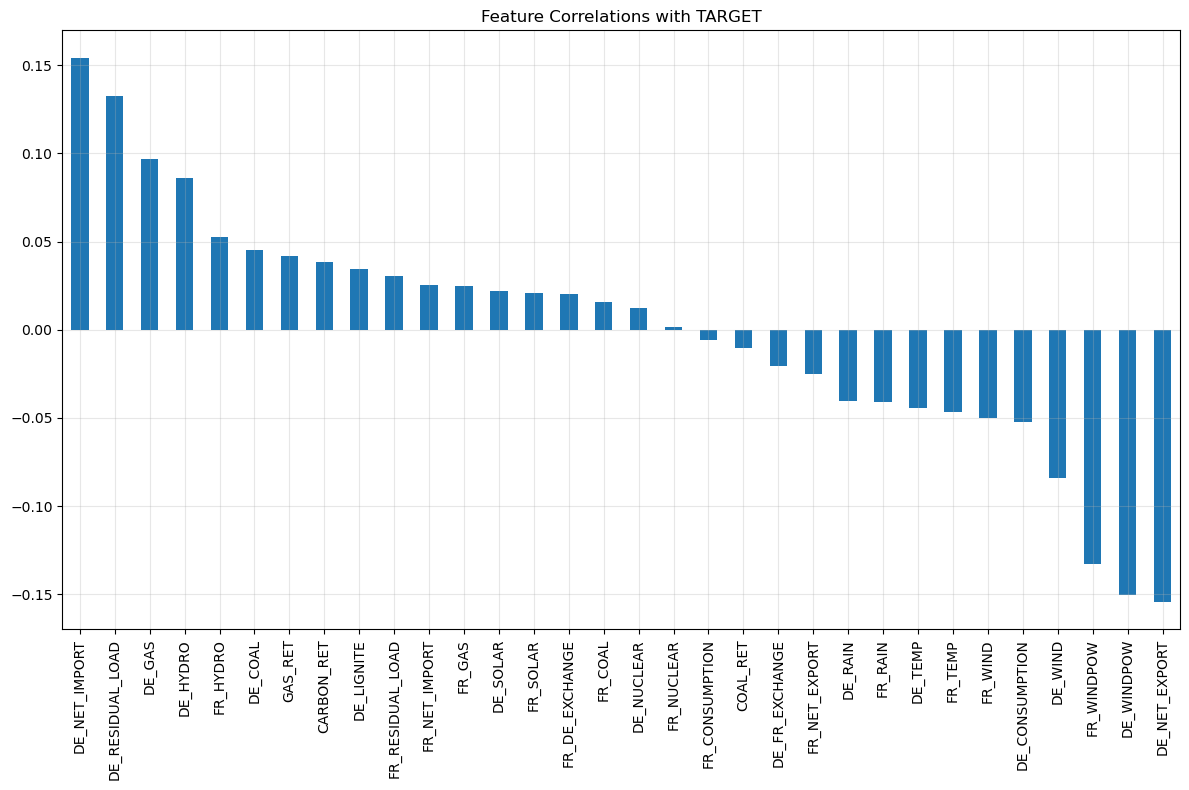

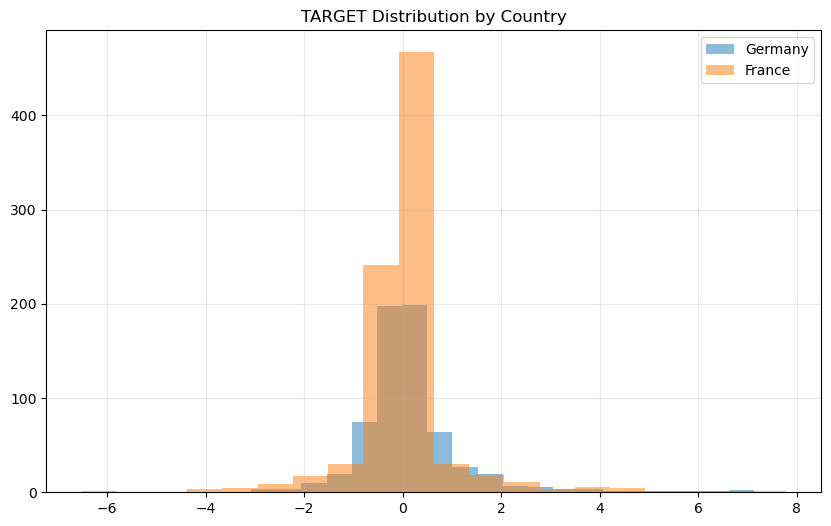

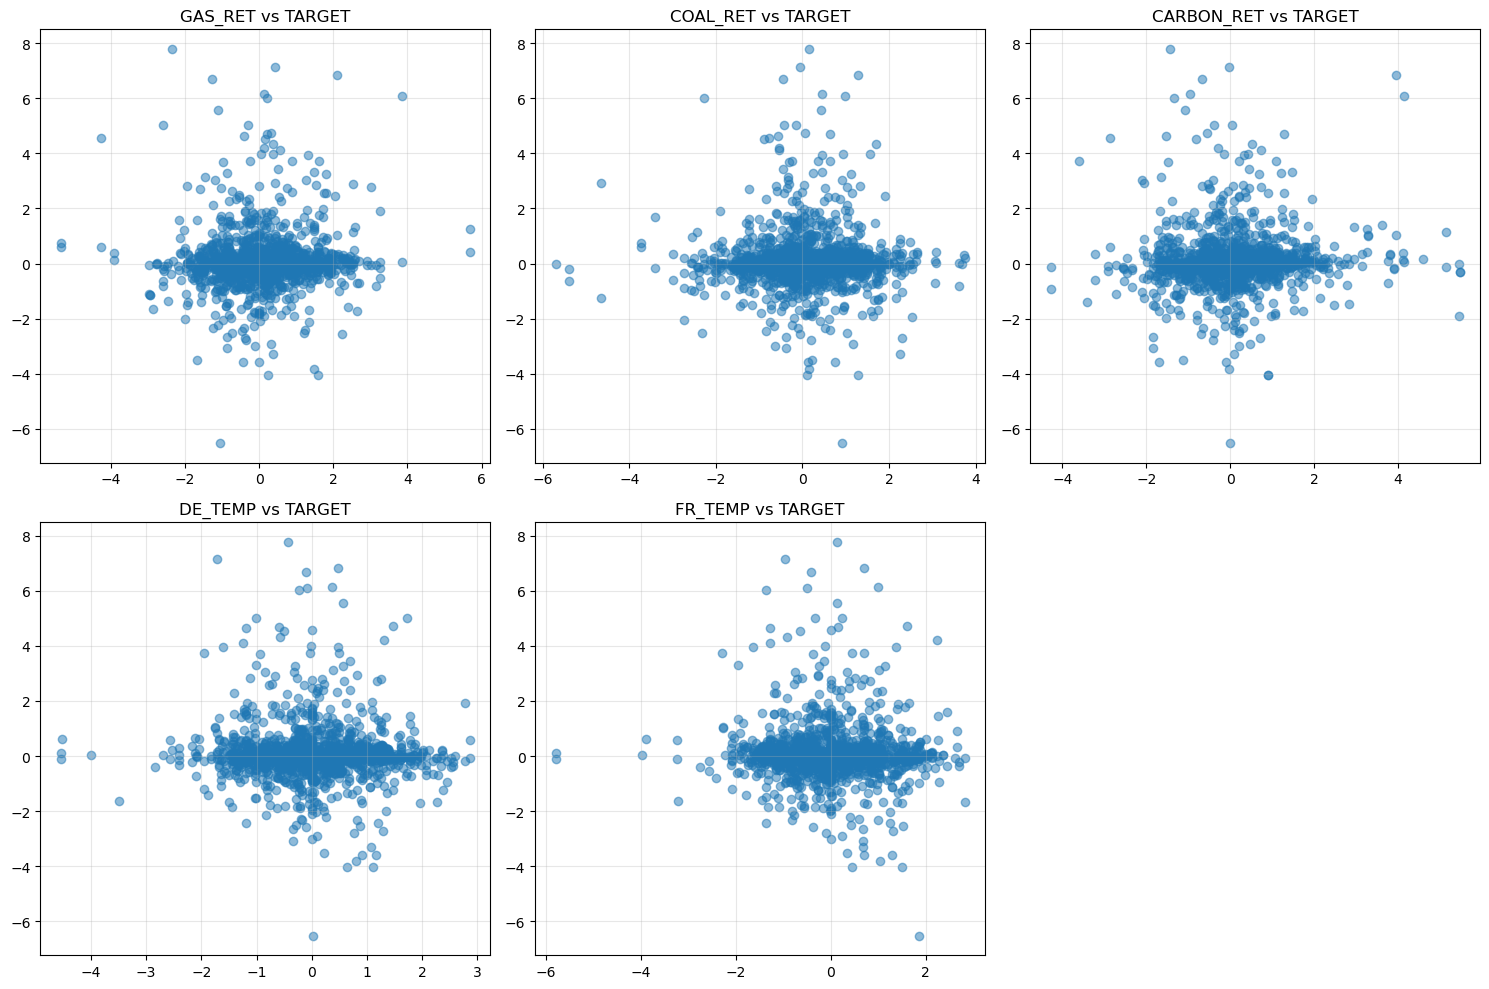

In [14]:
# Check missing values
missing_train = X_train.isna().sum().sort_values(ascending=False)
missing_test = X_test.isna().sum().sort_values(ascending=False)

# Display columns with missing values in both datasets
print("Missing values in training data:")
print(missing_train[missing_train > 0])
print("\nMissing values in test data:")
print(missing_test[missing_test > 0])

# Let's create a histogram of the target variable
plt.figure(figsize=(10, 6))
plt.hist(Y_train['TARGET'], bins=30, alpha=0.7, color='blue')
plt.title('Distribution of TARGET Variable')
plt.xlabel('TARGET Value')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

# Let's check correlations between features and target
# First, let's merge X_train and Y_train
merged_train = pd.merge(X_train, Y_train, on='ID')

# Calculate correlations with target variable
correlations = merged_train.drop(['ID', 'DAY_ID', 'COUNTRY'], axis=1).corr()['TARGET'].sort_values(ascending=False)

# Visualize top correlations
plt.figure(figsize=(12, 8))
correlations[1:].plot(kind='bar') # excluding TARGET's correlation with itself
# correlations[:].plot(kind='bar')  
plt.title('Feature Correlations with TARGET')
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Let's also check if there are differences between the countries
de_data = merged_train[merged_train['COUNTRY'] == 'DE']
fr_data = merged_train[merged_train['COUNTRY'] == 'FR']

plt.figure(figsize=(10, 6))
plt.hist(de_data['TARGET'], bins=20, alpha=0.5, label='Germany')
plt.hist(fr_data['TARGET'], bins=20, alpha=0.5, label='France')
plt.title('TARGET Distribution by Country')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Let's look at the weather and commodity variables
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(merged_train['GAS_RET'], merged_train['TARGET'], alpha=0.5)
plt.title('GAS_RET vs TARGET')
plt.grid(alpha=0.3)

plt.subplot(2, 3, 2)
plt.scatter(merged_train['COAL_RET'], merged_train['TARGET'], alpha=0.5)
plt.title('COAL_RET vs TARGET')
plt.grid(alpha=0.3)

plt.subplot(2, 3, 3)
plt.scatter(merged_train['CARBON_RET'], merged_train['TARGET'], alpha=0.5)
plt.title('CARBON_RET vs TARGET')
plt.grid(alpha=0.3)

plt.subplot(2, 3, 4)
plt.scatter(merged_train['DE_TEMP'].fillna(0), merged_train['TARGET'], alpha=0.5)
plt.title('DE_TEMP vs TARGET')
plt.grid(alpha=0.3)

plt.subplot(2, 3, 5)
plt.scatter(merged_train['FR_TEMP'].fillna(0), merged_train['TARGET'], alpha=0.5)
plt.title('FR_TEMP vs TARGET')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Time Pattern analysis

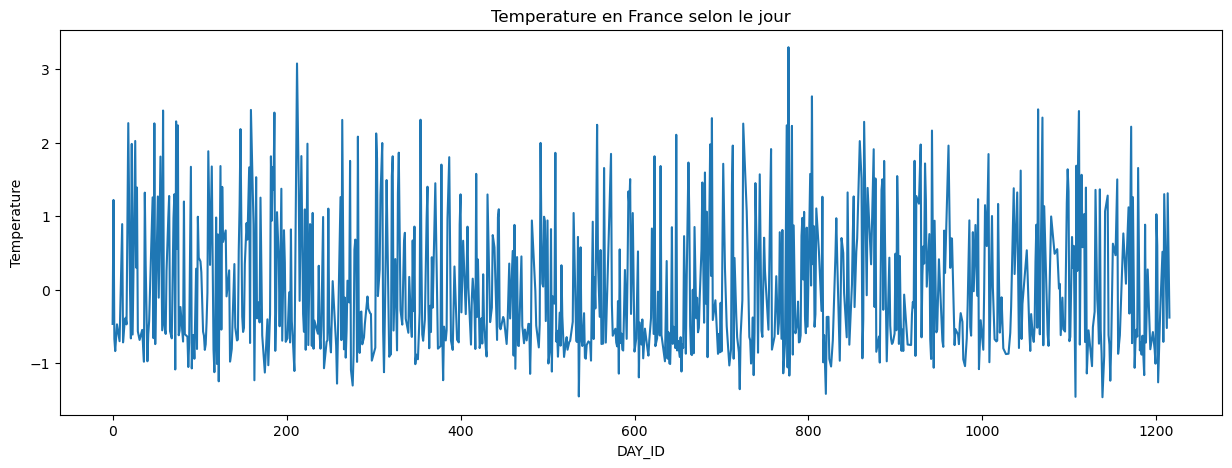

In [ ]:
country_data = X_train[X_train['COUNTRY'] == 'FR'].sort_values('DAY_ID')
plt.figure(figsize=(15, 5))
plt.plot(country_data['DAY_ID'], country_data['FR_CONSUMPTION'])
plt.title('Temperature en France selon la variable DAY_ID')
plt.xlabel('DAY_ID')
plt.ylabel('Temperature')
plt.show()

Missing Values Analysis

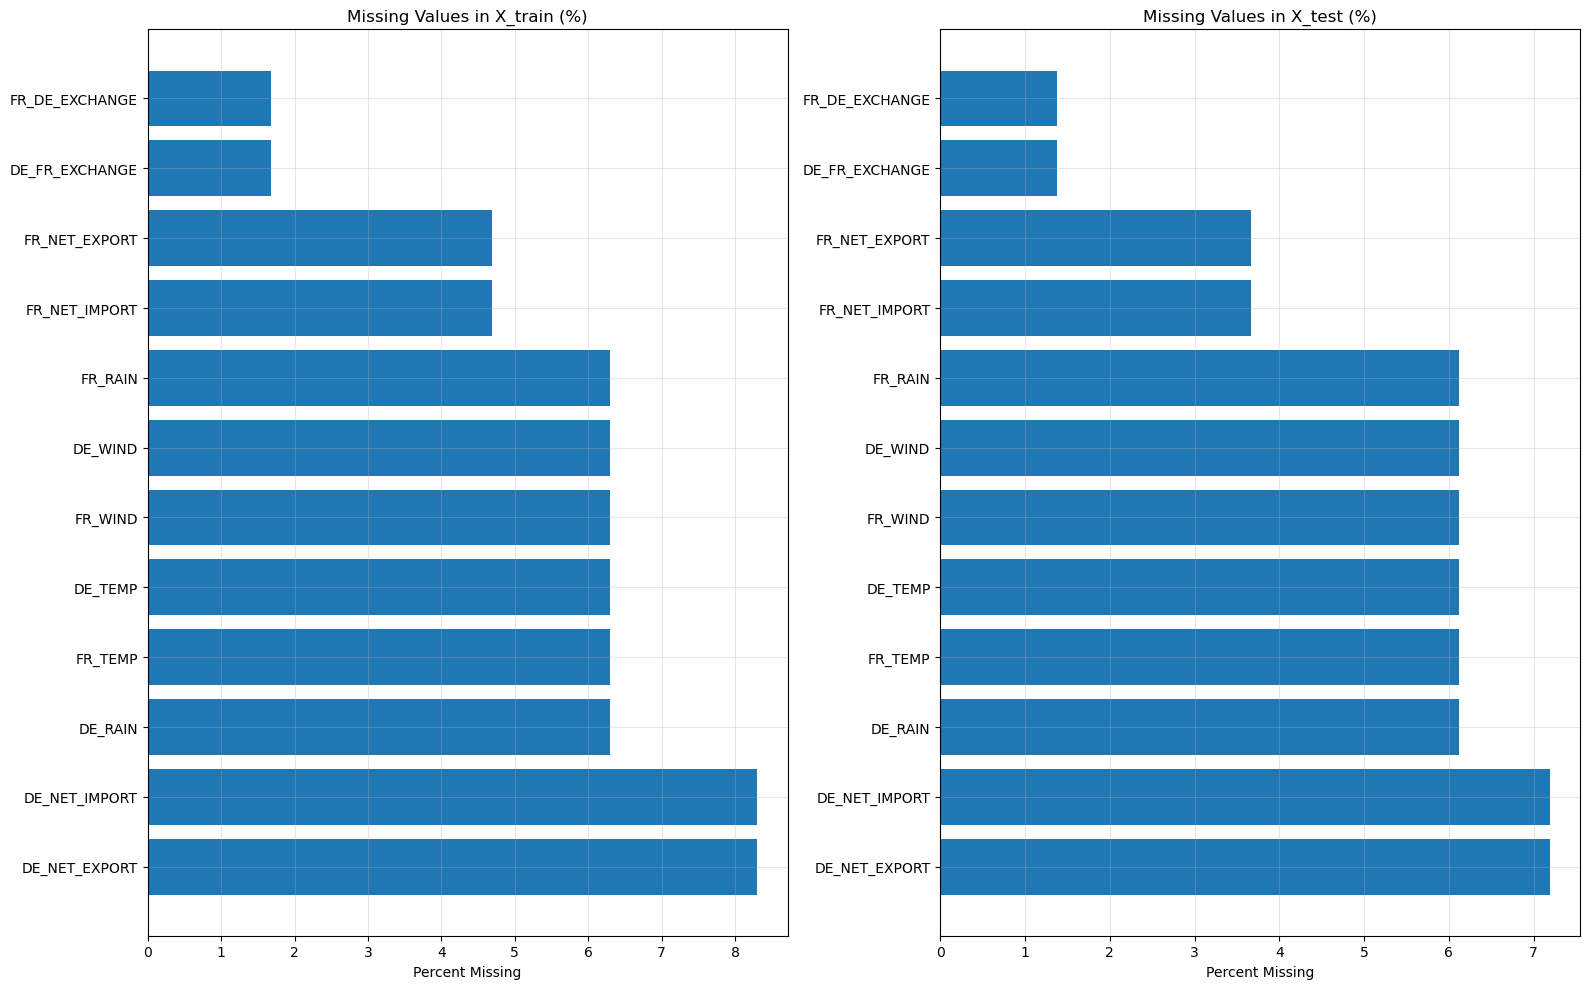


Are weather variables missing together in X_train?
0    1400
6      94
Name: count, dtype: int64

Are network exchange variables missing together in X_train?
0    1370
4      70
2      54
Name: count, dtype: int64


In [16]:
# Analyze missing values in detail
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# Visualize missing values in X_train
missing_train_df = pd.DataFrame({
    'column': X_train.columns,
    'percent_missing': X_train.isna().mean() * 100
}).sort_values('percent_missing', ascending=False)

# Only show columns with missing values
missing_train_df = missing_train_df[missing_train_df['percent_missing'] > 0]
axes[0].barh(missing_train_df['column'], missing_train_df['percent_missing'])
axes[0].set_title('Missing Values in X_train (%)')
axes[0].set_xlabel('Percent Missing')
axes[0].grid(alpha=0.3)

# Visualize missing values in X_test
missing_test_df = pd.DataFrame({
    'column': X_test.columns,
    'percent_missing': X_test.isna().mean() * 100
}).sort_values('percent_missing', ascending=False)

# Only show columns with missing values
missing_test_df = missing_test_df[missing_test_df['percent_missing'] > 0]
axes[1].barh(missing_test_df['column'], missing_test_df['percent_missing'])
axes[1].set_title('Missing Values in X_test (%)')
axes[1].set_xlabel('Percent Missing')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Check if weather variables are missing together
print("\nAre weather variables missing together in X_train?")
weather_vars = ['DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP']
weather_missing = X_train[weather_vars].isna().sum(axis=1)
print(weather_missing.value_counts())

# Check if network exchange variables are missing together
print("\nAre network exchange variables missing together in X_train?")
exchange_vars = ['DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT', 'FR_NET_IMPORT']
exchange_missing = X_train[exchange_vars].isna().sum(axis=1)
print(exchange_missing.value_counts())


#France/Germany Different Pattern comparison

Seem that it is really important to create 2 separate model to predict France or Germany

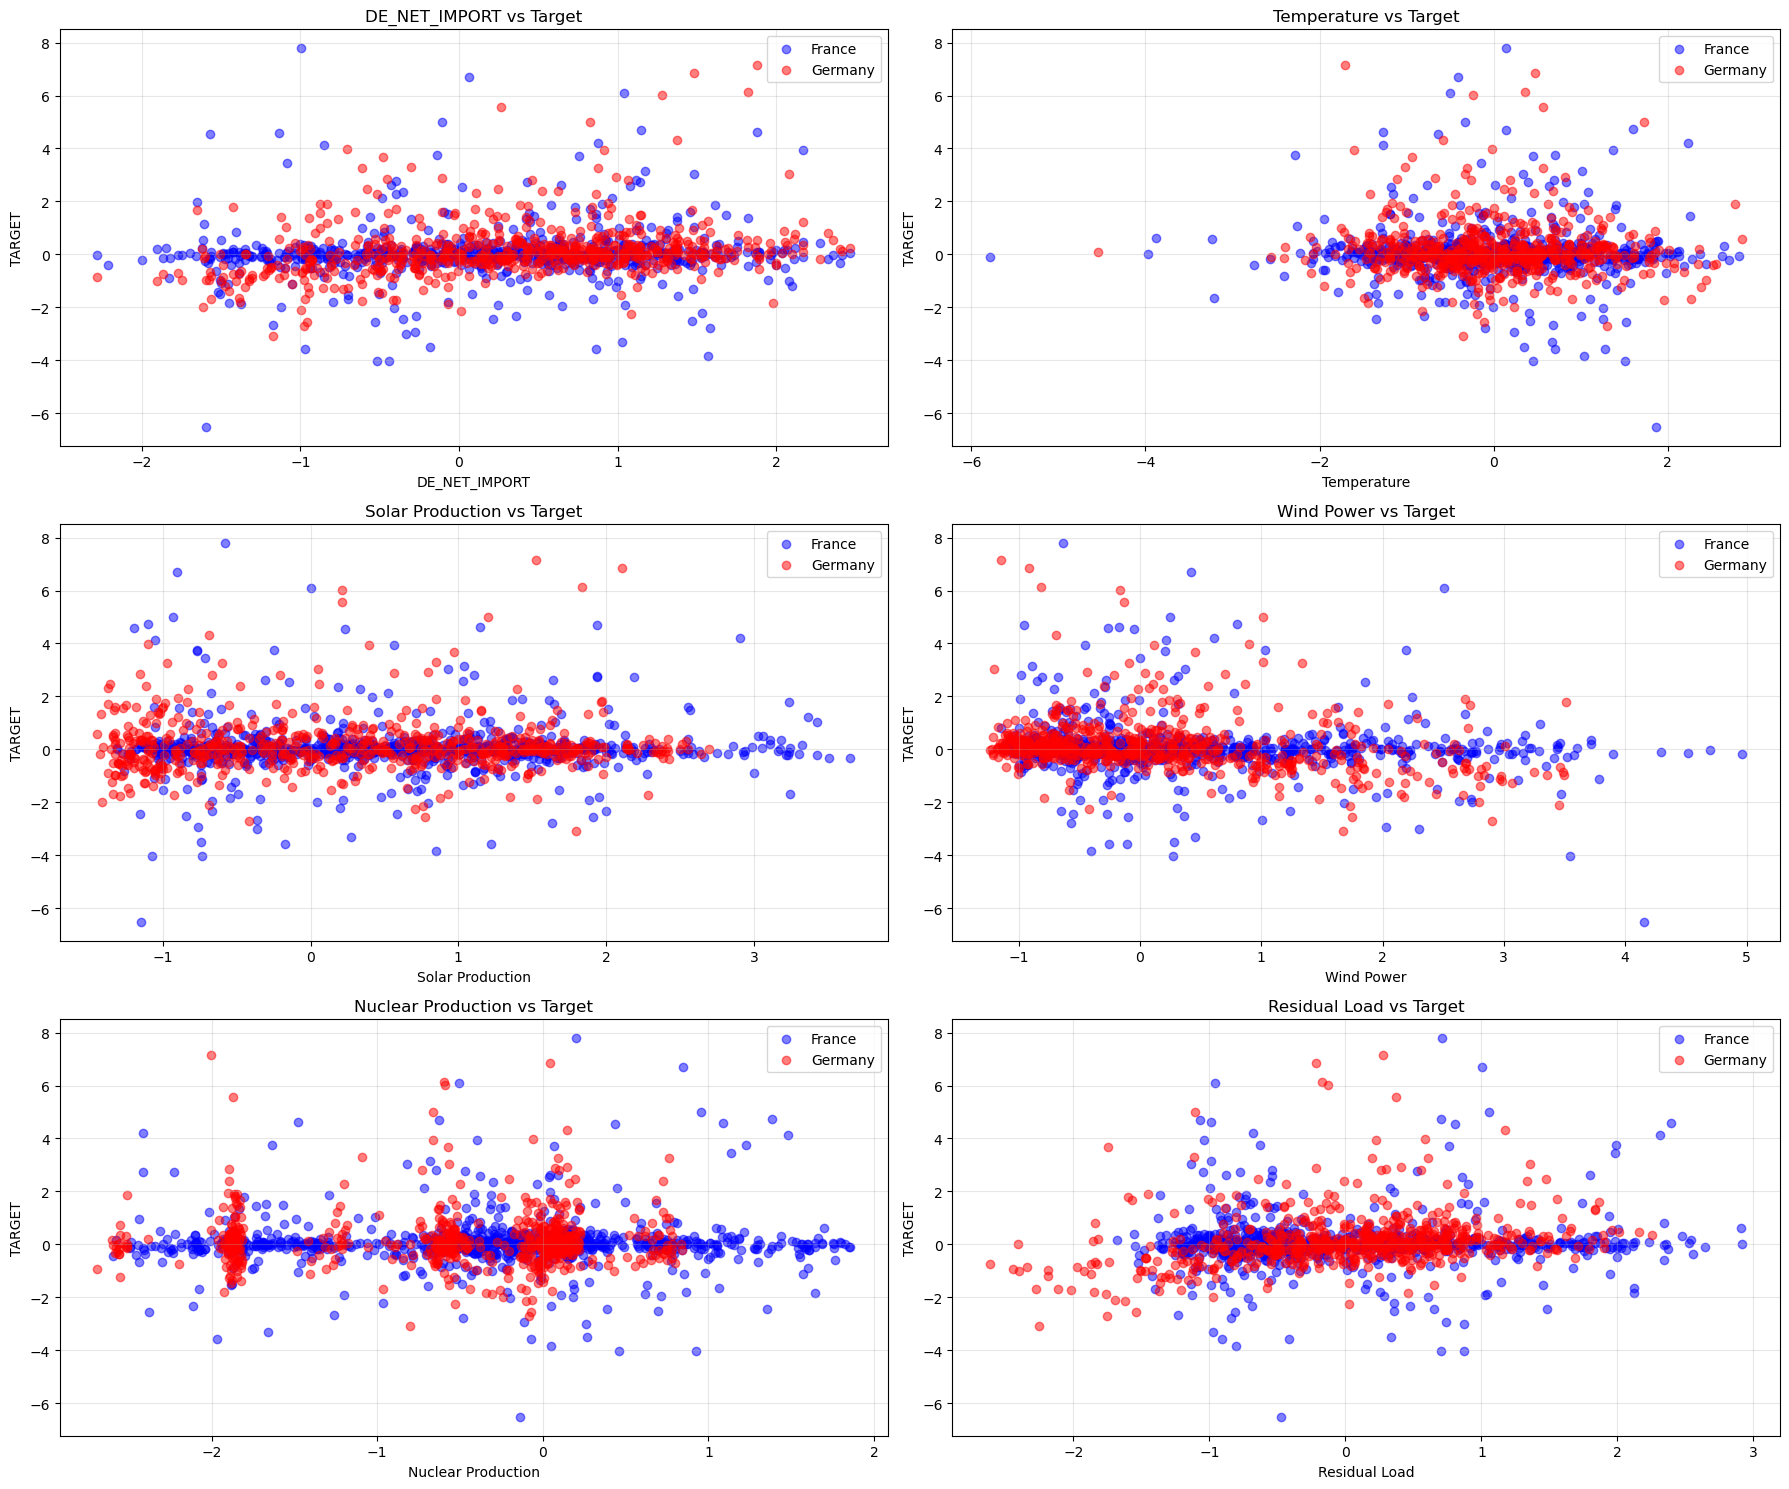

<Figure size 1200x1000 with 0 Axes>

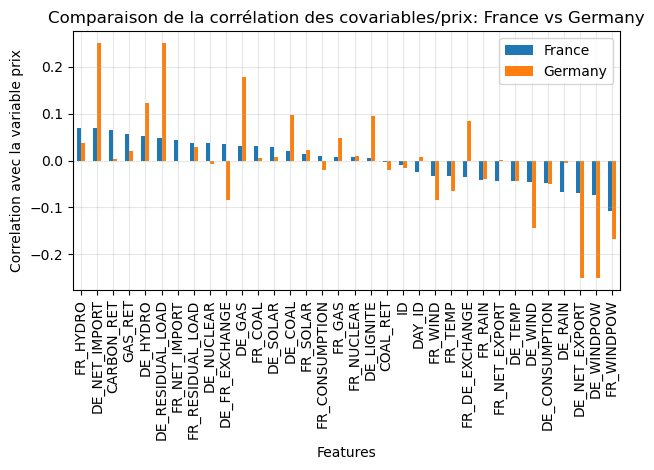

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378
5,1520,467,FR,-0.295296,-0.765120,-0.717490,0.717490,-1.117139,-0.200305,1.117139,...,-0.860628,-0.962519,-0.193837,-0.871600,-0.917234,0.102046,0.472708,0.891049,0.861408,1.124457


In [18]:
# Let's compare patterns between France and Germany

# Filter data for each country
fr_data = X_train[X_train['COUNTRY'] == 'FR']
de_data = X_train[X_train['COUNTRY'] == 'DE']

# Get target values for each country
merged = pd.merge(X_train, Y_train, on='ID')
fr_target = merged[merged['COUNTRY'] == 'FR']['TARGET']
de_target = merged[merged['COUNTRY'] == 'DE']['TARGET']

# Create a figure with multiple subplots to compare key variables
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# 1. Compare consumption patterns
axes[0, 0].scatter(fr_data['DE_NET_IMPORT'], fr_target, alpha=0.5, color='blue', label='France')
axes[0, 0].scatter(de_data['DE_NET_IMPORT'], de_target, alpha=0.5, color='red', label='Germany')
axes[0, 0].set_xlabel('DE_NET_IMPORT')
axes[0, 0].set_ylabel('TARGET')
axes[0, 0].set_title('DE_NET_IMPORT vs Target')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Compare temperature effect on target
axes[0, 1].scatter(fr_data['FR_TEMP'].dropna(), fr_target[fr_data['FR_TEMP'].notna().values], 
                 alpha=0.5, color='blue', label='France')
axes[0, 1].scatter(de_data['DE_TEMP'].dropna(), de_target[de_data['DE_TEMP'].notna().values], 
                 alpha=0.5, color='red', label='Germany')
axes[0, 1].set_xlabel('Temperature')
axes[0, 1].set_ylabel('TARGET')
axes[0, 1].set_title('Temperature vs Target')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Compare solar production
axes[1, 0].scatter(fr_data['FR_SOLAR'], fr_target, alpha=0.5, color='blue', label='France')
axes[1, 0].scatter(de_data['DE_SOLAR'], de_target, alpha=0.5, color='red', label='Germany')
axes[1, 0].set_xlabel('Solar Production')
axes[1, 0].set_ylabel('TARGET')
axes[1, 0].set_title('Solar Production vs Target')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Compare wind power
axes[1, 1].scatter(fr_data['FR_WINDPOW'], fr_target, alpha=0.5, color='blue', label='France')
axes[1, 1].scatter(de_data['DE_WINDPOW'], de_target, alpha=0.5, color='red', label='Germany')
axes[1, 1].set_xlabel('Wind Power')
axes[1, 1].set_ylabel('TARGET')
axes[1, 1].set_title('Wind Power vs Target')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# 5. Compare nuclear production
axes[2, 0].scatter(fr_data['FR_NUCLEAR'], fr_target, alpha=0.5, color='blue', label='France')
axes[2, 0].scatter(de_data['DE_NUCLEAR'], de_target, alpha=0.5, color='red', label='Germany')
axes[2, 0].set_xlabel('Nuclear Production')
axes[2, 0].set_ylabel('TARGET')
axes[2, 0].set_title('Nuclear Production vs Target')
axes[2, 0].legend()
axes[2, 0].grid(alpha=0.3)

# 6. Compare residual load
axes[2, 1].scatter(fr_data['FR_RESIDUAL_LOAD'], fr_target, alpha=0.5, color='blue', label='France')
axes[2, 1].scatter(de_data['DE_RESIDUAL_LOAD'], de_target, alpha=0.5, color='red', label='Germany')
axes[2, 1].set_xlabel('Residual Load')
axes[2, 1].set_ylabel('TARGET')
axes[2, 1].set_title('Residual Load vs Target')
axes[2, 1].legend()
axes[2, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Compare correlation patterns between countries
# First, drop the 'COUNTRY' column which is a string and causes conversion errors
fr_data_numeric = fr_data.drop('COUNTRY', axis=1)
de_data_numeric = de_data.drop('COUNTRY', axis=1)

# Calculate correlations using numeric data only
fr_corr = pd.merge(fr_data_numeric, Y_train, on='ID').corr()['TARGET'].sort_values(ascending=False)
de_corr = pd.merge(de_data_numeric, Y_train, on='ID').corr()['TARGET'].sort_values(ascending=False)

# Create a DataFrame to compare correlations between countries
corr_comparison = pd.DataFrame({
    'France': fr_corr,
    'Germany': de_corr
}).drop('TARGET')

# Plot correlation comparison
plt.figure(figsize=(12, 10))
corr_comparison.sort_values('France', ascending=False).plot(kind='bar')
plt.title('Comparaison de la corrélation des covariables/prix: France vs Germany')
plt.xlabel('Features')
plt.ylabel('Correlation avec la variable prix')
plt.grid(alpha=0.3)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


fr_data.head()


Correlation Analysis

Top 10 features most correlated with TARGET:
TARGET              1.000000
DE_NET_EXPORT       0.154301
DE_NET_IMPORT       0.154301
DE_WINDPOW          0.150287
DE_RESIDUAL_LOAD    0.132555
FR_WINDPOW          0.132523
DE_GAS              0.096657
DE_HYDRO            0.086127
DE_WIND             0.084127
FR_HYDRO            0.052820
Name: TARGET, dtype: float64


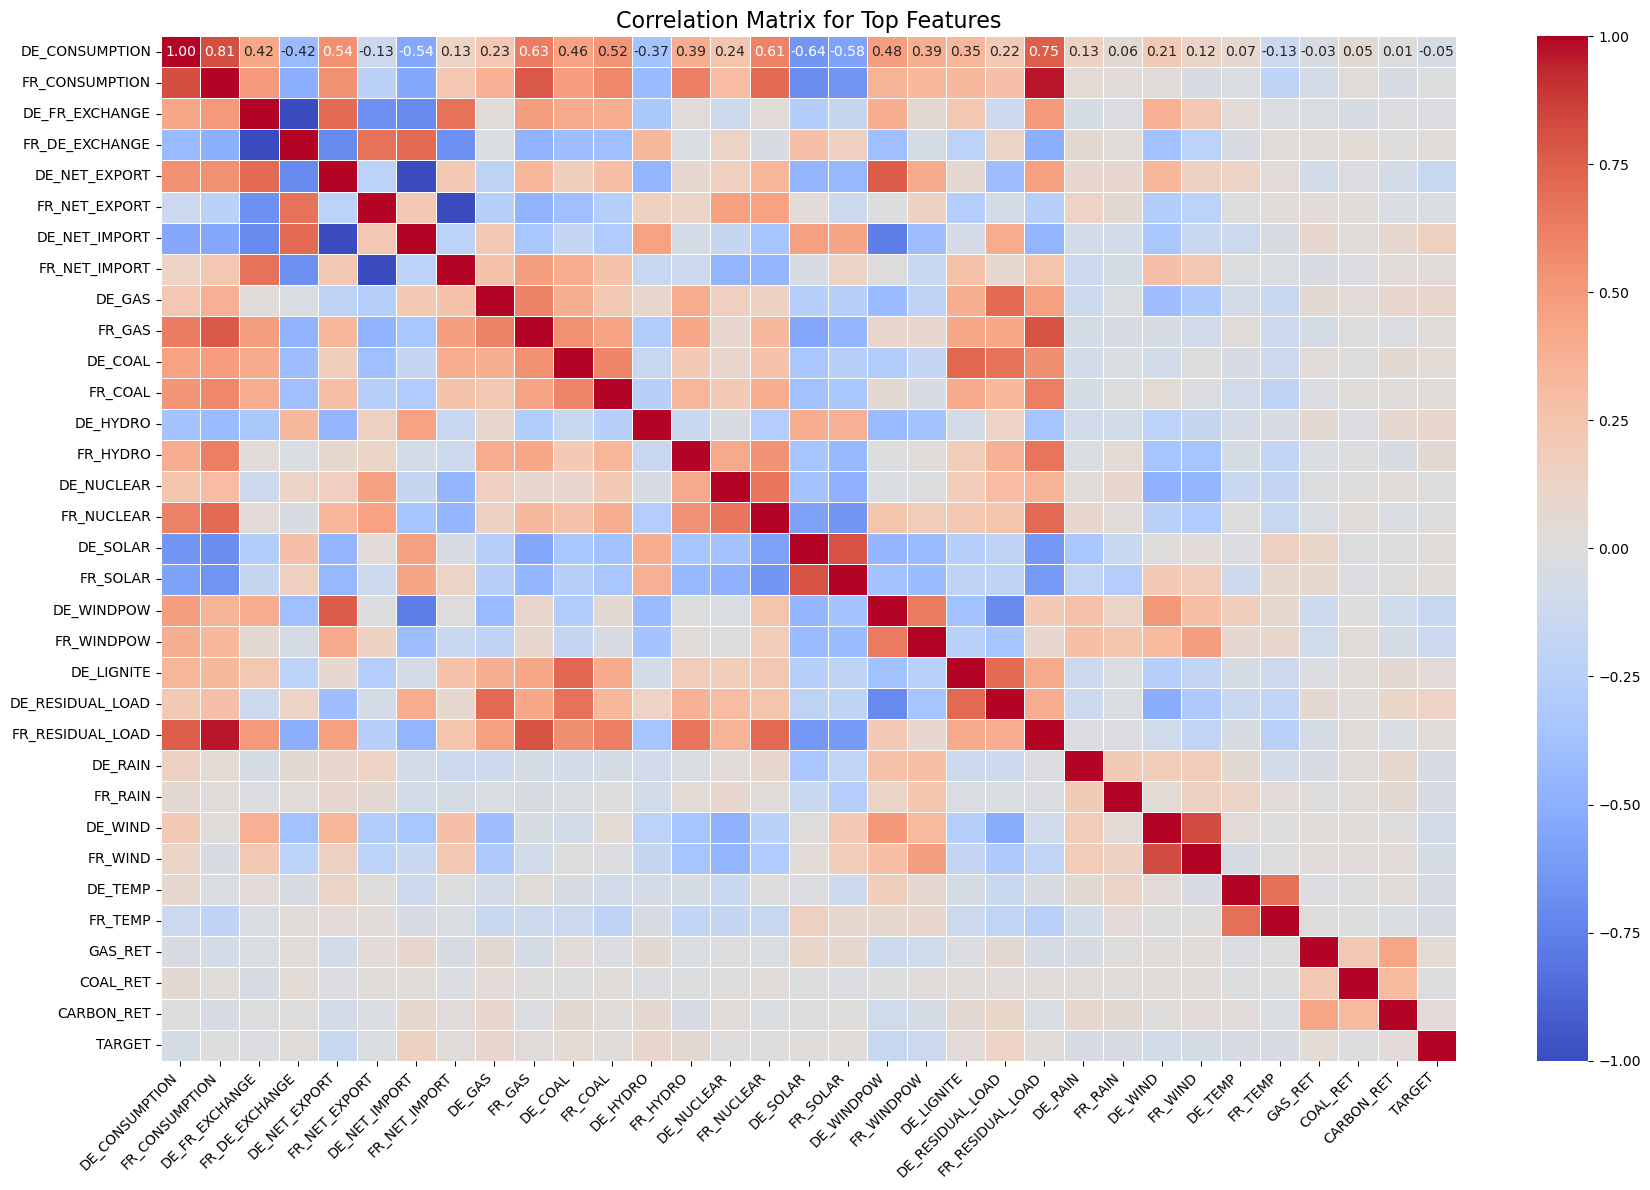

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import gridspec
# Create a figure to analyze correlations with target
plt.figure(figsize=(18, 12))

# Merge data for correlation analysis
merged_data = pd.merge(X_train, Y_train, on='ID')

# 1. Calculate absolute correlations with target and sort
abs_corr = merged_data.drop(['ID', 'DAY_ID', 'COUNTRY'], axis=1).corr()['TARGET'].abs().sort_values(ascending=False)

# 2. Calculate correlations by country
fr_data = merged_data[merged_data['COUNTRY'] == 'FR']
de_data = merged_data[merged_data['COUNTRY'] == 'DE']

fr_corr = fr_data.drop(['ID', 'DAY_ID', 'COUNTRY'], axis=1).corr()['TARGET']
de_corr = de_data.drop(['ID', 'DAY_ID', 'COUNTRY'], axis=1).corr()['TARGET']

# 3. Create correlation comparison dataframe
corr_comparison = pd.DataFrame({
    'Combined': merged_data.drop(['ID', 'DAY_ID', 'COUNTRY'], axis=1).corr()['TARGET'],
    'France': fr_corr,
    'Germany': de_corr
})

# 4. Plot top correlations
top_features = abs_corr.nlargest(14).index
# correlation_matrix = merged_data[top_features].corr()

correlation_matrix = merged_data.drop(['ID', 'DAY_ID', 'COUNTRY'], axis=1).corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix for Top Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

print("Top 10 features most correlated with TARGET:")
print(abs_corr.nlargest(10))